In [ ]:
import torch
from collections import Counter
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import spacy
from spacy import displacy
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# **Part a**

In [ ]:
# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# The given paragraph from Breaking Bad
text = ("Who are you talking to right now? Who is it you think you see? Do you know "
        "how much I make a year? I mean, even if I told you, you wouldn’t believe "
        "it. Do you know what would happen if I suddenly decided to stop going into "
        "work? A business big enough that it could be listed on the NASDAQ goes belly "
        "up. Disappears! It ceases to exist without me. No, you clearly don’t know who "
        "you’re talking to, so let me clue you in. I am not in danger, Skyler. I am the "
        "danger. A guy opens his door and gets shot and you think that of me? No. I "
        "am the one who knocks!")

# Process the text with Spacy
doc = nlp(text)

# Extract and print named entities
named_entities = [(entity.text, entity.label_) for entity in doc.ents]
named_entities
#%%
for token in doc:
  print(token.text, token.lemma_, token.tag_, token.dep_)

#%%
sentence_spans = list(doc.sents)
for sentences in sentence_spans:
  print(sentences)

#%%
displacy.serve(doc, style="dep")

Who who WP pobj
are be VBP aux
you you PRP nsubj
talking talk VBG ROOT
to to IN prep
right right RB advmod
now now RB advmod
? ? . punct
Who who WP attr
is be VBZ ROOT
it it PRP nsubj
you you PRP nsubj
think think VBP parataxis
you you PRP nsubj
see see VBP ccomp
? ? . punct
Do do VBP aux
you you PRP nsubj
know know VB ROOT
how how WRB advmod
much much RB advmod
I I PRP nsubj
make make VBP ccomp
a a DT det
year year NN npadvmod
? ? . punct
I I PRP nsubj
mean mean VBP parataxis
, , , punct
even even RB advmod
if if IN mark
I I PRP nsubj
told tell VBD advcl
you you PRP dobj
, , , punct
you you PRP nsubj
would would MD aux
n’t not RB neg
believe believe VB ROOT
it it PRP dobj
. . . punct
Do do VBP aux
you you PRP nsubj
know know VB ROOT
what what WP nsubj
would would MD aux
happen happen VB ccomp
if if IN mark
I I PRP nsubj
suddenly suddenly RB advmod
decided decide VBD advcl
to to TO aux
stop stop VB xcomp
going go VBG xcomp
into into IN prep
work work NN pobj
? ? . punct
A a DT det
busi

/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...



# Part B

In [ ]:
# Given text
text = ("Who are you talking to right now? Who is it you think you see? Do you know "
        "how much I make a year? I mean, even if I told you, you wouldn’t believe "
        "it. Do you know what would happen if I suddenly decided to stop going into "
        "work? A business big enough that it could be listed on the NASDAQ goes belly "
        "up. Disappears! It ceases to exist without me. No, you clearly don’t know who "
        "you’re talking to, so let me clue you in. I am not in danger, Skyler. I am the "
        "danger. A guy opens his door and gets shot and you think that of me? No. I "
        "am the one who knocks!")

# Preprocess the text
words = text.lower().replace("\n", " ").split()
vocab = set(words)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

data = []
for i in range(2, len(words) - 1):
    context = [words[i - 2], words[i - 1]]
    target = words[i]
    data.append((context, target))

In [ ]:
# Define the model
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).sum(dim=0).view((1, -1))
        out = self.linear(embeds)
        log_probs = nn.functional.log_softmax(out, dim=1)
        return log_probs

# Training the model
def train_cbow(context, target, model, loss_function, optimizer):
    context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)
    model.zero_grad()
    log_probs = model(context_idxs)
    loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))
    loss.backward()
    optimizer.step()

    return loss.item()

Epoch: 0 Loss: 525.9073734283447
Epoch: 1 Loss: 501.9033715724945
Epoch: 2 Loss: 478.6312174797058
Epoch: 3 Loss: 456.1320445537567
Epoch: 4 Loss: 434.43731582164764
Epoch: 5 Loss: 413.56485295295715
Epoch: 6 Loss: 393.517902135849
Epoch: 7 Loss: 374.28764712810516
Epoch: 8 Loss: 355.8578157424927
Epoch: 9 Loss: 338.2091634273529
Epoch: 10 Loss: 321.32242262363434
Epoch: 11 Loss: 305.17942357063293
Epoch: 12 Loss: 289.7631243467331
Epoch: 13 Loss: 275.0571166276932
Epoch: 14 Loss: 261.0452992320061
Epoch: 15 Loss: 247.7116249203682
Epoch: 16 Loss: 235.04005199670792
Epoch: 17 Loss: 223.01445466279984
Epoch: 18 Loss: 211.61850970983505
Epoch: 19 Loss: 200.8354412317276
Epoch: 20 Loss: 190.6477684378624
Epoch: 21 Loss: 181.03710314631462
Epoch: 22 Loss: 171.98395511507988
Epoch: 23 Loss: 163.46772065758705
Epoch: 24 Loss: 155.46671804785728
Epoch: 25 Loss: 147.9583658874035
Epoch: 26 Loss: 140.9193874001503
Epoch: 27 Loss: 134.32602787017822
Epoch: 28 Loss: 128.15436732769012
Epoch: 29 L

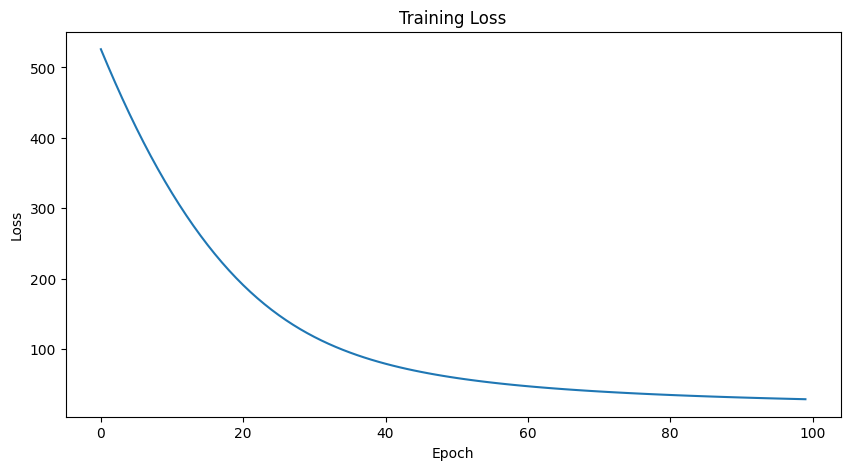

In [ ]:


# Set hyperparameters
embedding_dim = 100
learning_rate = 0.001
epochs = 100

# Initialize model, loss function, and optimizer
model = CBOW(vocab_size, embedding_dim)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
losses = []
for epoch in range(epochs):
    total_loss = 0
    for context, target in data:
        loss = train_cbow(context, target, model, loss_function, optimizer)
        total_loss += loss
    losses.append(total_loss)
    print('Epoch:', epoch, 'Loss:', total_loss)

# Plot the training loss
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# **Part b** optimized

Epoch 1, Loss: 560.4745359420776
Epoch 2, Loss: 514.1940417289734
Epoch 3, Loss: 470.52457880973816
Epoch 4, Loss: 429.53183126449585
Epoch 5, Loss: 391.265964448452
Epoch 6, Loss: 355.9627125263214
Epoch 7, Loss: 323.4573241472244
Epoch 8, Loss: 293.66639733314514
Epoch 9, Loss: 266.37817829847336
Epoch 10, Loss: 241.49585872888565
Epoch 11, Loss: 218.89063426852226
Epoch 12, Loss: 198.39395305514336
Epoch 13, Loss: 179.88492813706398
Epoch 14, Loss: 163.13435128331184
Epoch 15, Loss: 148.08797121047974
Epoch 16, Loss: 134.57483541965485
Epoch 17, Loss: 122.54221484065056
Epoch 18, Loss: 111.78810915350914
Epoch 19, Loss: 102.23254935443401
Epoch 20, Loss: 93.75096772611141
Epoch 21, Loss: 86.23084157705307
Epoch 22, Loss: 79.58705553412437
Epoch 23, Loss: 73.67847163975239
Epoch 24, Loss: 68.42548315227032
Epoch 25, Loss: 63.76814541220665
Epoch 26, Loss: 59.599023923277855
Epoch 27, Loss: 55.905902445316315
Epoch 28, Loss: 52.57820463180542
Epoch 29, Loss: 49.588482677936554
Epoch 3

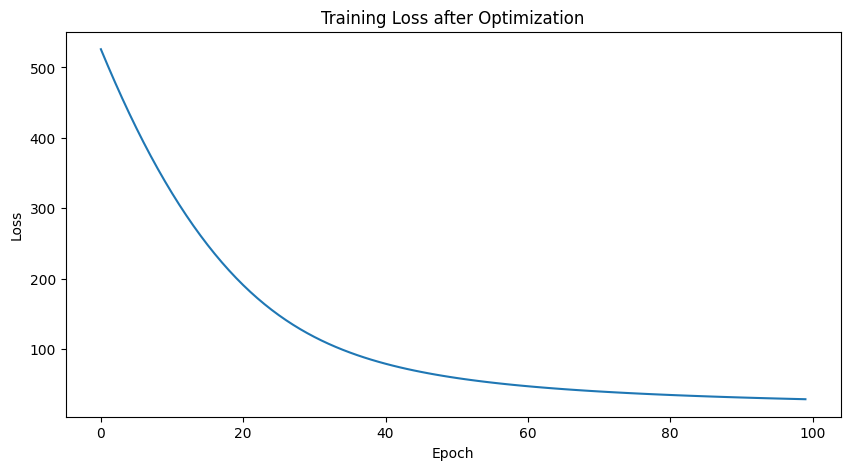

In [ ]:

text = ("Who are you talking to right now? Who is it you think you see? Do you know "
        "how much I make a year? I mean, even if I told you, you wouldn’t believe "
        "it. Do you know what would happen if I suddenly decided to stop going into "
        "work? A business big enough that it could be listed on the NASDAQ goes belly "
        "up. Disappears! It ceases to exist without me. No, you clearly don’t know who "
        "you’re talking to, so let me clue you in. I am not in danger, Skyler. I am the "
        "danger. A guy opens his door and gets shot and you think that of me? No. I "
        "am the one who knocks!")

# Tokenization and building the vocabulary
tokens = text.lower().split()
vocab = set(tokens)
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

# Creating context-target pairs
context_size = 2  # We use two words to the left and two to the right as the context
data = []
for i in range(context_size, len(tokens) - context_size):
    context = [tokens[i - 2], tokens[i - 1], tokens[i + 1], tokens[i + 2]]
    target = tokens[i]
    data.append((context, target))

# Define a dataset
class WordDataset(Dataset):
    def __init__(self, data, word_to_ix):
        self.data = data
        self.word_to_ix = word_to_ix

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        context, target = self.data[idx]
        context_idxs = torch.tensor([self.word_to_ix[w] for w in context], dtype=torch.long)
        target_idx = torch.tensor([self.word_to_ix[target]], dtype=torch.long)
        return context_idxs, target_idx

dataset = WordDataset(data, word_to_ix)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

#%%
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, context_idxs):
        embeds = self.embeddings(context_idxs).sum(dim=0)
        out = self.linear(embeds)
        log_probs = torch.log_softmax(out, dim=0)
        return log_probs

#%%
# Hyperparameters
embedding_dim = 100
learning_rate = 0.001
epochs = 100

# Model, Loss, and Optimizer
model = SkipGram(len(vocab), embedding_dim)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for context, target in dataloader:
        model.zero_grad()
        log_probs = model(context.squeeze())
        loss = loss_function(log_probs, target.squeeze())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss}")


# Plot the training loss
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss after Optimization')
plt.show()